# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [14]:
A + B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [15]:
A * B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

### Dot product

In [ ]:
A.shape

In [ ]:
B.shape

In [ ]:
A.dot(B)

In [ ]:
np.dot(A, B)

In [ ]:
B.dot(A)

In [ ]:
C.shape

In [ ]:
A.shape

In [ ]:
C.dot(A)

In [ ]:
A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [16]:
df = pd.read_csv('../data/banknotes.csv')

In [17]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [18]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [19]:
import seaborn as sns

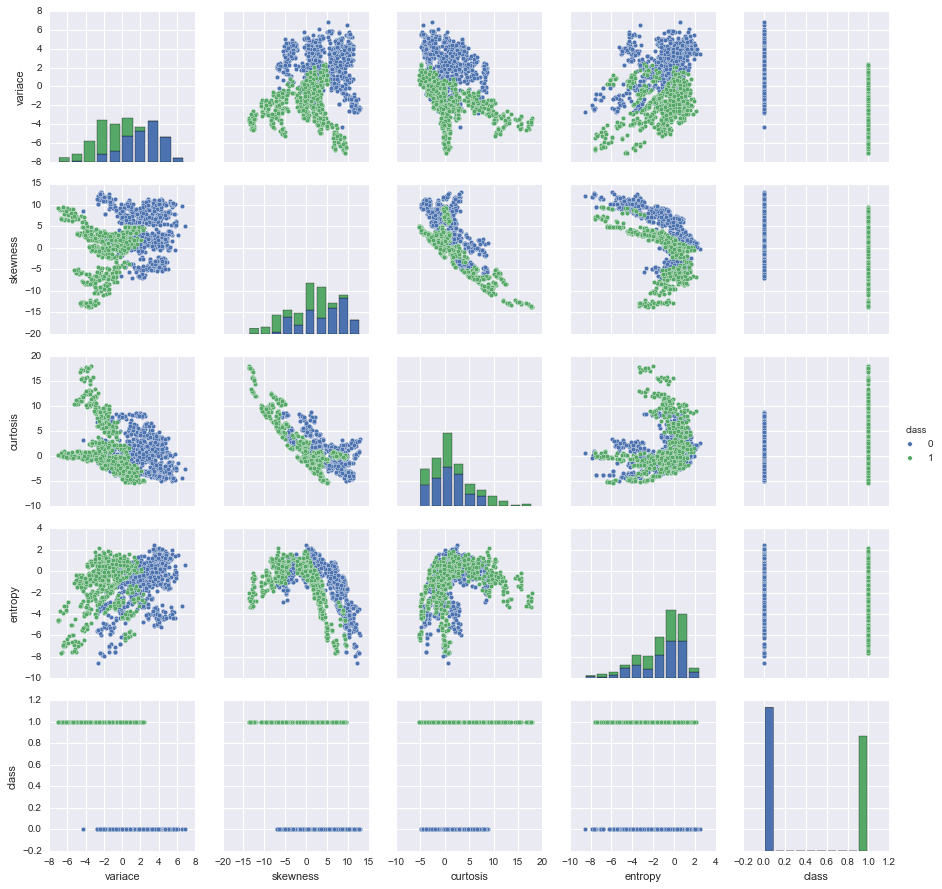

In [20]:
sns.pairplot(df, hue="class")

#### Baseline model

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [22]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [23]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99126638,  0.98905908,  0.99562363])

### Logistic Regression Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [25]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [26]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.8260 - acc: 0.5615     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.7607 - acc: 0.5750     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.7015 - acc: 0.5917     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.6484 - acc: 0.6062     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.6011 - acc: 0.6375     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.5593 - acc: 0.6760     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.5226 - acc: 0.6948     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.4905 - acc: 0.7312     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.4627 - acc: 0.7667     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [27]:
historydf = pd.DataFrame(history.history, index=history.epoch)

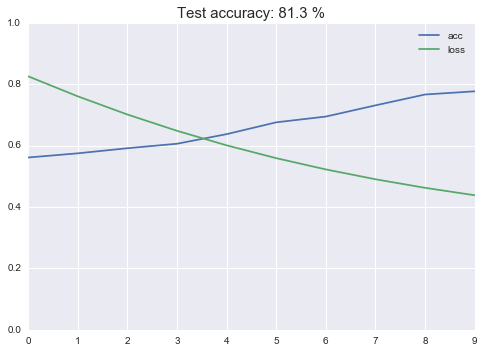

In [28]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [29]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [30]:
historydf = pd.concat(dflist, axis=1)

In [31]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.634375,0.642164,0.754167,0.561166,0.818750,0.417133,0.845833,0.351121
1,0.796875,0.533231,0.921875,0.349770,0.895833,0.296438,0.964583,0.139521
2,0.876042,0.460625,0.937500,0.284746,0.929167,0.236008,0.972917,0.099965
3,0.908333,0.410053,0.945833,0.246246,0.948958,0.197635,0.978125,0.082548
4,0.936458,0.373169,0.947917,0.219361,0.955208,0.171425,0.977083,0.072894
5,0.952083,0.345099,0.954167,0.199019,0.961458,0.152524,0.980208,0.066438
6,0.955208,0.322980,0.956250,0.183051,0.966667,0.138372,0.979167,0.061805
7,0.962500,0.305073,0.958333,0.170064,0.968750,0.127326,0.980208,0.058339
8,0.966667,0.290188,0.961458,0.159361,0.969792,0.118364,0.981250,0.055237
9,0.968750,0.277562,0.964583,0.150334,0.970833,0.111152,0.981250,0.053168


In [32]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [33]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.634375  0.642164  0.754167  0.561166  0.818750  0.417133   
1              0.796875  0.533231  0.921875  0.349770  0.895833  0.296438   
2              0.876042  0.460625  0.937500  0.284746  0.929167  0.236008   
3              0.908333  0.410053  0.945833  0.246246  0.948958  0.197635   
4              0.936458  0.373169  0.947917  0.219361  0.955208  0.171425   
5              0.952083  0.345099  0.954167  0.199019  0.961458  0.152524   
6              0.955208  0.322980  0.956250  0.183051  0.966667  0.138372   
7              0.962500  0.305073  0.958333  0.170064  0.968750  0.127326   
8              0.966667  0.290188  0.961458  0.159361  0.969792  0.118364   
9              0.968750  0.277562  0.964583  0.150334  0.970833  0.111152   

learning_rate      0.50            
metric              acc      loss  
0              0.845833  0.351121  
1              0.964583  0.139521  
2              0.972917  0.099965  
3              0.978125  0.082548  
4              0.977083  0.072894  
5              0.980208  0.066438  
6              0.979167  0.061805  
7              0.980208  0.058339  
8              0.981250  0.055237  
9              0.981250  0.053168

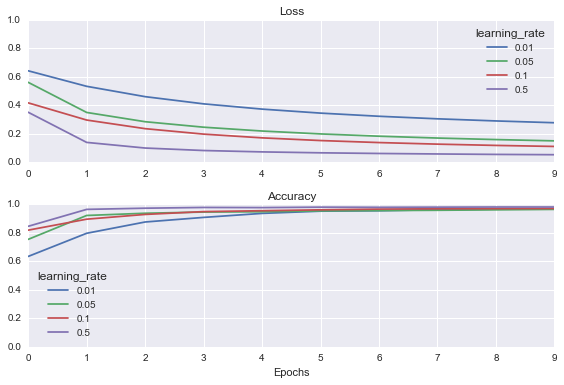

In [34]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [35]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [36]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [37]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.667708  0.577500  0.620833  0.613837  0.421875  0.941627   
1           0.758333  0.520605  0.671875  0.572332  0.445833  0.878769   
2           0.817708  0.477199  0.739583  0.537055  0.465625  0.822037   
3           0.855208  0.443364  0.797917  0.506887  0.489583  0.771350   
4           0.868750  0.416334  0.834375  0.480978  0.517708  0.726447   
5           0.875000  0.394105  0.872917  0.458606  0.546875  0.686795   
6           0.885417  0.375406  0.892708  0.439116  0.605208  0.652056   
7           0.896875  0.359375  0.903125  0.422030  0.655208  0.621581   
8           0.897917  0.345377  0.910417  0.406944  0.729167  0.594832   
9           0.904167  0.332959  0.913542  0.393506  0.818750  0.571319   

batch_size       128            
metric           acc      loss  
0           0.465625  0.986924  
1           0.471875  0.962214  
2           0.477083  0.938012  
3           0.487500  0.914329  
4           0.496875  0.890828  
5           0.506250  0.868803  
6           0.515625  0.847425  
7           0.525000  0.826870  
8           0.542708  0.806667  
9           0.548958  0.787455

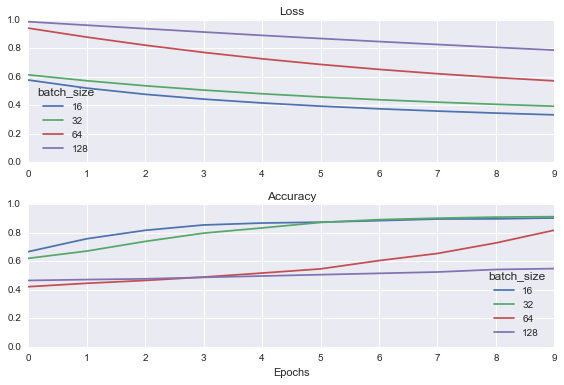

In [38]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [39]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [40]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [41]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

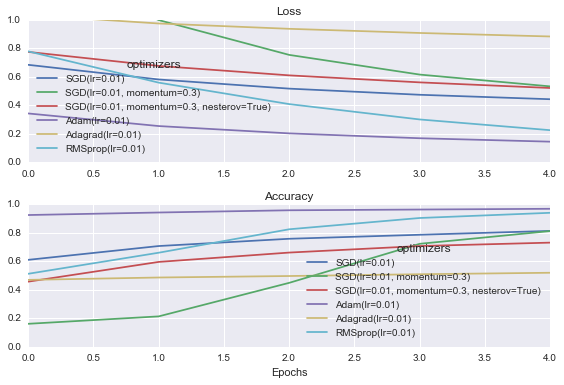

In [42]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [43]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [44]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

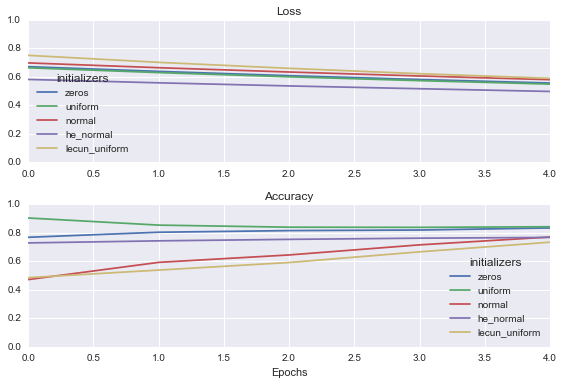

In [45]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [46]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s - loss: 0.6695 - acc: 0.6429 - val_loss: 0.6457 - val_acc: 0.6146
Epoch 2/20
672/672 [==============================] - 0s - loss: 0.5693 - acc: 0.7307 - val_loss: 0.5611 - val_acc: 0.6875
Epoch 3/20
672/672 [==============================] - 0s - loss: 0.4704 - acc: 0.7827 - val_loss: 0.4333 - val_acc: 0.7917
Epoch 4/20
672/672 [==============================] - 0s - loss: 0.3504 - acc: 0.8542 - val_loss: 0.3189 - val_acc: 0.8507
Epoch 5/20
672/672 [==============================] - 0s - loss: 0.2635 - acc: 0.8854 - val_loss: 0.2275 - val_acc: 0.8993
Epoch 6/20
672/672 [==============================] - 0s - loss: 0.1962 - acc: 0.9152 - val_loss: 0.1553 - val_acc: 0.9306
Epoch 7/20
672/672 [==============================] - 0s - loss: 0.1412 - acc: 0.9390 - val_loss: 0.1028 - val_acc: 0.9618
Epoch 8/20
672/672 [==============================] - 0s - loss: 0.0972 - acc: 0.9524 - val_l

In [47]:
result

[0.030113638812694157, 0.98786407766990292]

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.layers

In [50]:
inp = model.layers[0].input
out = model.layers[0].output

In [51]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [52]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [53]:
features_function = K.function([inp], [out])

In [54]:
features_function

In [55]:
features_function([X_test])[0].shape

(412, 2)

In [56]:
features = features_function([X_test])[0]

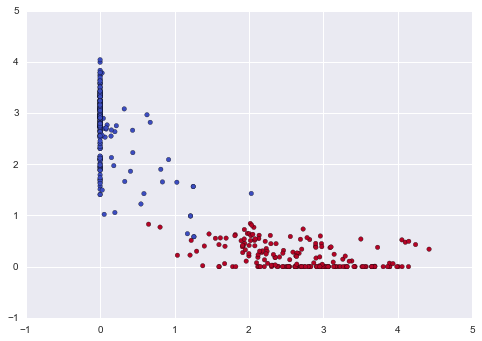

In [57]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [58]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

 32/412 [=>............................] - ETA: 0s

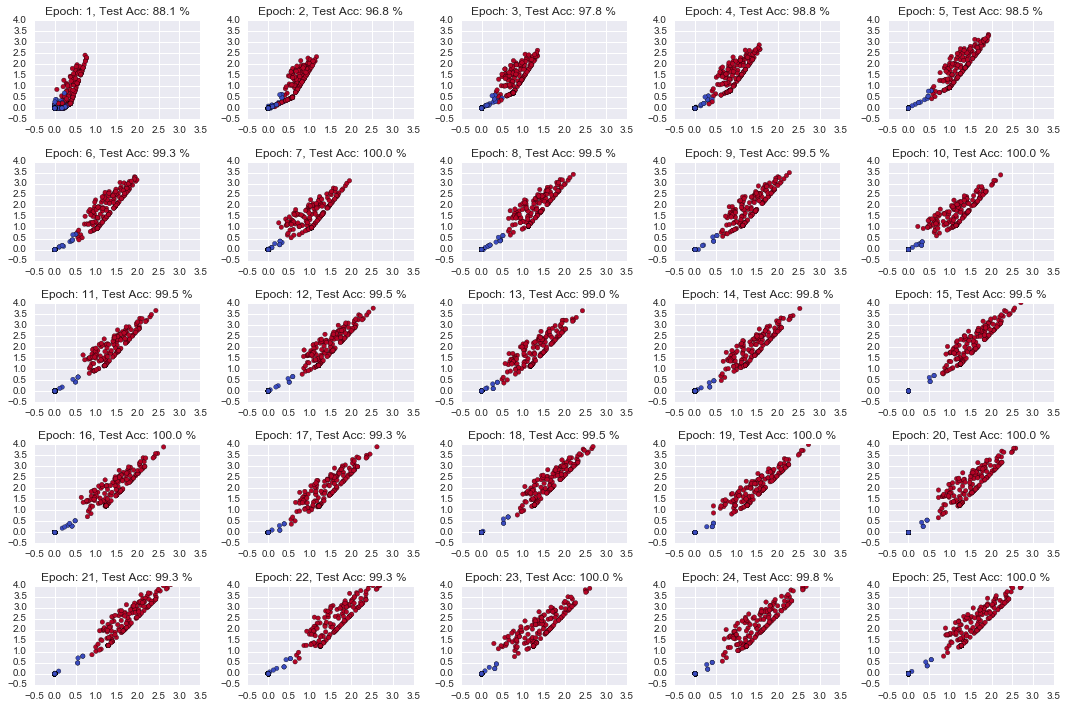

In [59]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard